In [1]:
import numpy as np
import pandas as pd
import os
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('../DATA/Sleep_health_and_lifestyle_dataset.csv', index_col = 'Person ID')

In [3]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [5]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
print('Unique Values of Occupation are', df['Occupation'].unique())

print('\nUnique Values of BMI Category are', df['BMI Category'].unique())

print('\nUnique Values of Sleep Disorder are', df['Sleep Disorder'].unique())

Unique Values of Occupation are ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Unique Values of BMI Category are ['Overweight' 'Normal' 'Obese' 'Normal Weight']

Unique Values of Sleep Disorder are ['None' 'Sleep Apnea' 'Insomnia']


In [7]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [8]:
#import label encoder
from sklearn import preprocessing 
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,1,27,9,6.1,6,42,6,2,126/83,77,4200,1
2,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
3,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
4,1,28,6,5.9,4,30,8,1,140/90,85,3000,2
5,1,28,6,5.9,4,30,8,1,140/90,85,3000,2


In [58]:
print('Unique Values of Occupation are', df['Occupation'].unique())

Unique Values of Occupation are [ 9  1  6 10  5  2  0  8  3  7  4]


In [9]:
df1 = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)

In [10]:
df1 = df1.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})

In [11]:
df1

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
Person ID,,,,,,,,,,,,,
1,1,27,9,6.1,6,42,6,2,77,4200,1,126,83
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
4,1,28,6,5.9,4,30,8,1,85,3000,2,140,90
5,1,28,6,5.9,4,30,8,1,85,3000,2,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0,59,5,8.1,9,75,3,2,68,7000,2,140,95
371,0,59,5,8.0,9,75,3,2,68,7000,2,140,95
372,0,59,5,8.1,9,75,3,2,68,7000,2,140,95


In [12]:
num_col = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps', 'BloodPressure_Upper_Value', 'BloodPressure_Lower_Value']

Q1 = df1[num_col].quantile(0.25)
Q3 = df1[num_col].quantile(0.75)
IQR = Q3 - Q1

df1 = df1[~((df1[num_col] < (Q1 - 1.5 * IQR)) | (df1[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
df1.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper_Value,BloodPressure_Lower_Value
Person ID,,,,,,,,,,,,,
1,1,27,9,6.1,6,42,6,2,77,4200,1,126,83
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
8,1,29,1,7.8,7,75,6,0,70,8000,1,120,80
9,1,29,1,7.8,7,75,6,0,70,8000,1,120,80


In [14]:
# Machine Learning - Multi-Classification Prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, f1_score

In [15]:
X = df1.drop('Sleep Disorder', axis=1)
y = df1['Sleep Disorder']

In [16]:
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,BloodPressure_Upper_Value,BloodPressure_Lower_Value
Person ID,,,,,,,,,,,,
1,1,27,9,6.1,6,42,6,2,77,4200,126,83
2,1,28,1,6.2,6,60,8,0,75,10000,125,80
3,1,28,1,6.2,6,60,8,0,75,10000,125,80
8,1,29,1,7.8,7,75,6,0,70,8000,120,80
9,1,29,1,7.8,7,75,6,0,70,8000,120,80
...,...,...,...,...,...,...,...,...,...,...,...,...
370,0,59,5,8.1,9,75,3,2,68,7000,140,95
371,0,59,5,8.0,9,75,3,2,68,7000,140,95
372,0,59,5,8.1,9,75,3,2,68,7000,140,95


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

LOGISTIC REGRESSION

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

#logreg = LogisticRegression(penalty='l2', C=0.7886178861788617)
logreg = LogisticRegression()

In [25]:
logreg.fit(X_train, y_train)

LogisticRegression()

SUPPORT VECTOR MACHINE

In [26]:
from sklearn.svm import SVC

#svm_model = SVC(C=1.0, kernel='rbf', gamma='auto', probability=True)
svm_model = SVC(probability=True)

In [27]:
svm_model.fit(X_train, y_train)

SVC(probability=True)

KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=37)

In [29]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=37)

RANDOM FOREST

In [30]:
from sklearn.ensemble import RandomForestClassifier
#rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=2, min_samples_split=2, random_state=42, class_weight='balanced')

rf_params = {
    'n_estimators': 1837,
    'min_samples_split': 0.15,
    'min_samples_leaf': 1,
    'max_depth': 48,
    'bootstrap': True
}

rf_classifier = RandomForestClassifier(**rf_params)
#rf_classifier = RandomForestClassifier()

In [31]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=48, min_samples_split=0.15, n_estimators=1837)

DECISION TREE

In [32]:
dtc = DecisionTreeClassifier(random_state=42)

In [33]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

GRADIENT BOOSTING

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [35]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [26]:
from sklearn import metrics
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

ValueError: multiclass format is not supported

In [28]:
y_score = logreg.predict_proba(X_test)

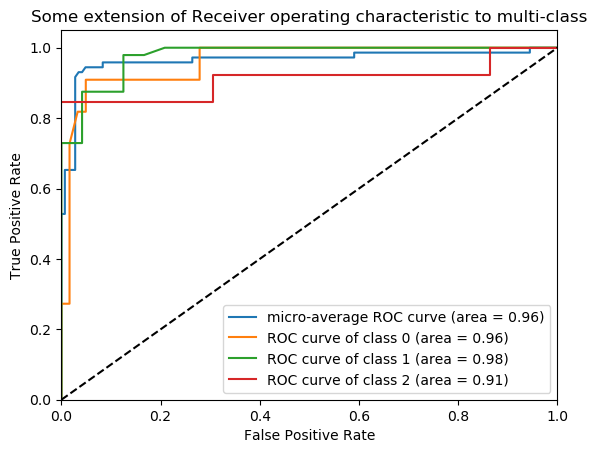

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # replace [0, 1, 2] with your classes
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [30]:
from sklearn.metrics import recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

Random Forest:
	Recall: 0.94
	F1-score: 0.94

	Precision: 0.94

SVM:
	Recall: 0.69
	F1-score: 0.69

	Precision: 0.69

Logistic Regression:
	Recall: 0.93
	F1-score: 0.93

	Precision: 0.93

KNN:
	Recall: 0.92
	F1-score: 0.92

	Precision: 0.92

Gradient Boosting:
	Recall: 0.94
	F1-score: 0.94

	Precision: 0.94

Decision Tree:
	Recall: 0.93
	F1-score: 0.93

	Precision: 0.93



In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assume y_true is your ground truth labels and y_pred are the predicted labels
y_true = y_test
y_pred = logreg.predict(X_test)

# Example metrics calculation
precision = precision_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'
recall = recall_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'
f1 = f1_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.92
Recall: 0.88
F1 Score: 0.90


In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assume y_true is your ground truth labels and y_pred are the predicted labels
y_true = y_test
y_pred = svm_model.predict(X_test)

# Example metrics calculation
precision = precision_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'
recall = recall_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'
f1 = f1_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.56
Recall: 0.38
F1 Score: 0.36


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assume y_true is your ground truth labels and y_pred are the predicted labels
y_true = y_test
y_pred = knn_model.predict(X_test)

# Example metrics calculation
precision = precision_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'
recall = recall_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'
f1 = f1_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.89
Recall: 0.87
F1 Score: 0.88


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assume y_true is your ground truth labels and y_pred are the predicted labels
y_true = y_test
y_pred = rf_classifier.predict(X_test)

# Example metrics calculation
precision = precision_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'
recall = recall_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'
f1 = f1_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.91
Recall: 0.91
F1 Score: 0.91


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assume y_true is your ground truth labels and y_pred are the predicted labels
y_true = y_test
y_pred = dtc.predict(X_test)

# Example metrics calculation
precision = precision_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'
recall = recall_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'
f1 = f1_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.88
Recall: 0.90
F1 Score: 0.89


In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assume y_true is your ground truth labels and y_pred are the predicted labels
y_true = y_test
y_pred = gb.predict(X_test)

# Example metrics calculation
precision = precision_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'
recall = recall_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'
f1 = f1_score(y_true, y_pred, average='macro') # or 'micro' or 'weighted'

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.91
Recall: 0.91
F1 Score: 0.91


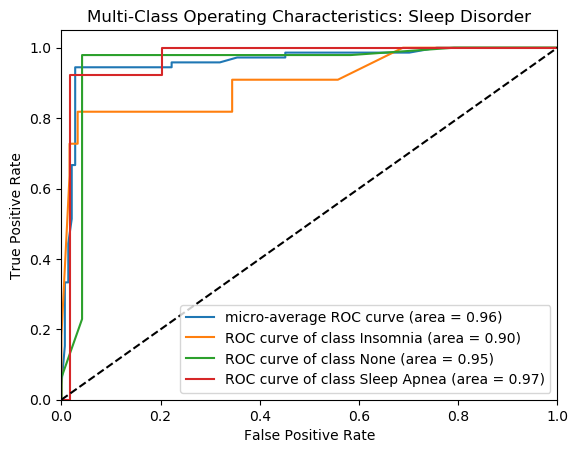

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Your model and data
# gb, X_test, y_test should be defined here

y_score = gb.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Define class labels
class_labels = ['Insomnia', 'None', 'Sleep Apnea']

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Operating Characteristics: Sleep Disorder')
plt.legend(loc="lower right")
plt.show()

In [53]:
print('\nUnique Values of Sleep Disorder are', df['Sleep Disorder'].unique())


Unique Values of Sleep Disorder are [1 2 0]
